In [38]:
import numpy as np
import random as rnd
import timeit
import matplotlib.pyplot as plt

M = np.zeros((3, 3))
R = np.zeros((3, 3))

def randm():
    for i in range (0, 3):
        for j in range (0, 3):
            M[i][j] = rnd.randint(0, 9)
            
randm()
print(M)

[[5. 1. 8.]
 [5. 0. 1.]
 [5. 0. 7.]]


In [96]:
l = []
n = []

for i in range(0, 1000):
    randm()
    start = timeit.default_timer()
    
    for i in range(0, 3):
        for j in range(0, 3):
            R[j][i] = (M[(i+1)%3][(j+1)%3]*M[(i+2)%3][(j+2)%3]) - (M[(i+1)%3][(j+2)%3]*M[(i+2)%3][(j+1)%3]);
    
    stop = timeit.default_timer()
    l.append((stop-start)*1000)
    
for i in range(0, 1000):
    randm()
    start = timeit.default_timer()
    
    for i in range(0, 3):
        R[0][i] = (M[(i+1)%3][1]*M[(i+2)%3][2]) - (M[(i+1)%3][2]*M[(i+2)%3][1]);
        R[1][i] = (M[(i+1)%3][2]*M[(i+2)%3][0]) - (M[(i+1)%3][0]*M[(i+2)%3][2]);
        R[2][i] = (M[(i+1)%3][0]*M[(i+2)%3][1]) - (M[(i+1)%3][1]*M[(i+2)%3][0]);

    
    stop = timeit.default_timer()
    n.append((stop-start)*1000)

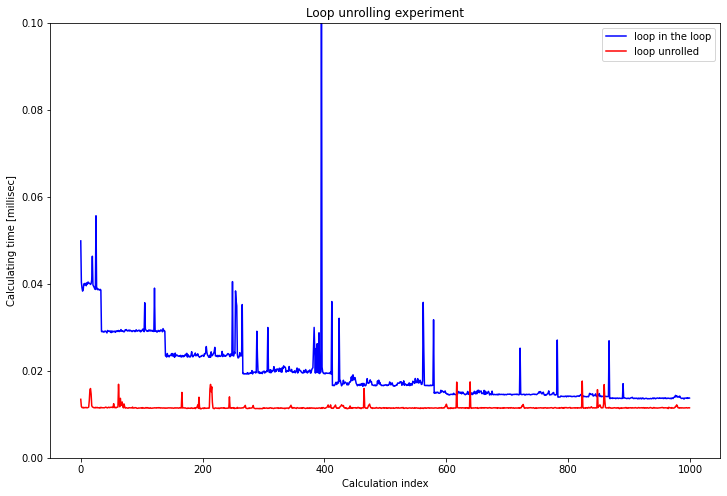

In [97]:
x = np.linspace(0, 999, 1000)

plt.plot(x, l, 'b', x, n, 'r')
plt.ylim(0, 0.1)
#plt.xlim(95000, 100000)
plt.ylabel('Calculating time [millisec]')
plt.xlabel('Calculation index')
plt.title('Loop unrolling experiment')
plt.rcParams['figure.figsize'] = [12, 8]
plt.legend(['loop in the loop', 'loop unrolled'])
plt.show()